In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Import Crashes Dataframe
file = "Crashes_w_Region.csv"
crashes_df = pd.read_csv(file)
crashes_df.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'Lat', 'Lng', 'Region 

In [3]:
crashes_df["YEAR"] = pd.DatetimeIndex(crashes_df["CRASH_DATE"]).year
crashes_df["MONTH"] = pd.DatetimeIndex(crashes_df["CRASH_DATE"]).month

In [4]:
#Yearly summary of injuries
yearly = crashes_df.groupby(["YEAR"])
accidentsy = yearly["RD_NO"].count()
injuriesy = yearly["INJURIES_TOTAL"].sum()
fatalitiesy = yearly["INJURIES_FATAL"].sum()

yearly_df = pd.DataFrame({"Accidents" : accidentsy, "Injuries" : injuriesy, "Fatalities" : fatalitiesy})
yearly_df

,Accidents,Injuries,Fatalities
YEAR,,,
2017,83079,12820.0,83.0
2018,117253,21652.0,122.0
2019,23301,3819.0,20.0


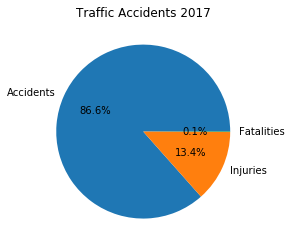

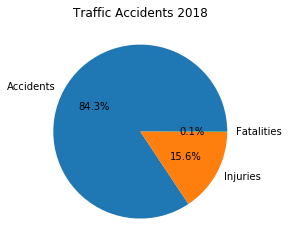

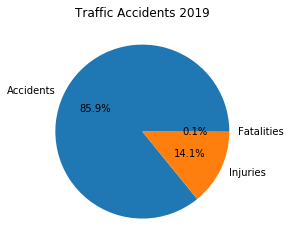

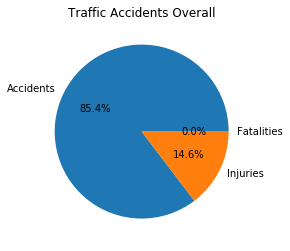

<Figure size 432x288 with 0 Axes>

In [64]:
#Pie chart showing proportion of Accidents/Injuries/Fatalities per year
data2017 = [yearly_df["Accidents"][2017], yearly_df["Injuries"][2017], yearly_df["Fatalities"][2017]]
data2018 = [yearly_df["Accidents"][2018], yearly_df["Injuries"][2018], yearly_df["Fatalities"][2018]]
data2019 = [yearly_df["Accidents"][2019], yearly_df["Injuries"][2019], yearly_df["Fatalities"][2019]]
total = [yearly_df["Accidents"].sum(), yearly_df["Injuries"].sum(), yearly_df["Fatalities"][2017].sum()]

labels = ["Accidents", "Injuries", "Fatalities"]
plt.figure(0)
plt.pie(data2017, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents 2017")
plt.figure(1)
plt.pie(data2018, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents 2018")
plt.figure(2)
plt.pie(data2019, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents 2019")
plt.figure(3)
plt.pie(total, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents Overall")
plt.show()
plt.savefig("Images/Crashes_Injuries_Pie.png")

In [87]:
#Separate Accidents by zone
zones = crashes_df["Region ID"].value_counts()
zones_gb = crashes_df.groupby(["Region ID"])
zones_df = pd.DataFrame({"Accidents" : zones_gb["Region ID"].count(), "Injuries" : zones_gb["INJURIES_TOTAL"].sum(), "Fatalities" : zones_gb["INJURIES_FATAL"].sum()})
zones_df

,Accidents,Injuries,FATALITIES
Region ID,,,
1,5106,538.0,0.0
2,7593,1165.0,3.0
3,10364,1388.0,5.0
4,5864,736.0,4.0
5,12253,1834.0,7.0
6,9638,1326.0,5.0
7,9184,1487.0,3.0
8,11375,1529.0,5.0
9,5991,1266.0,5.0


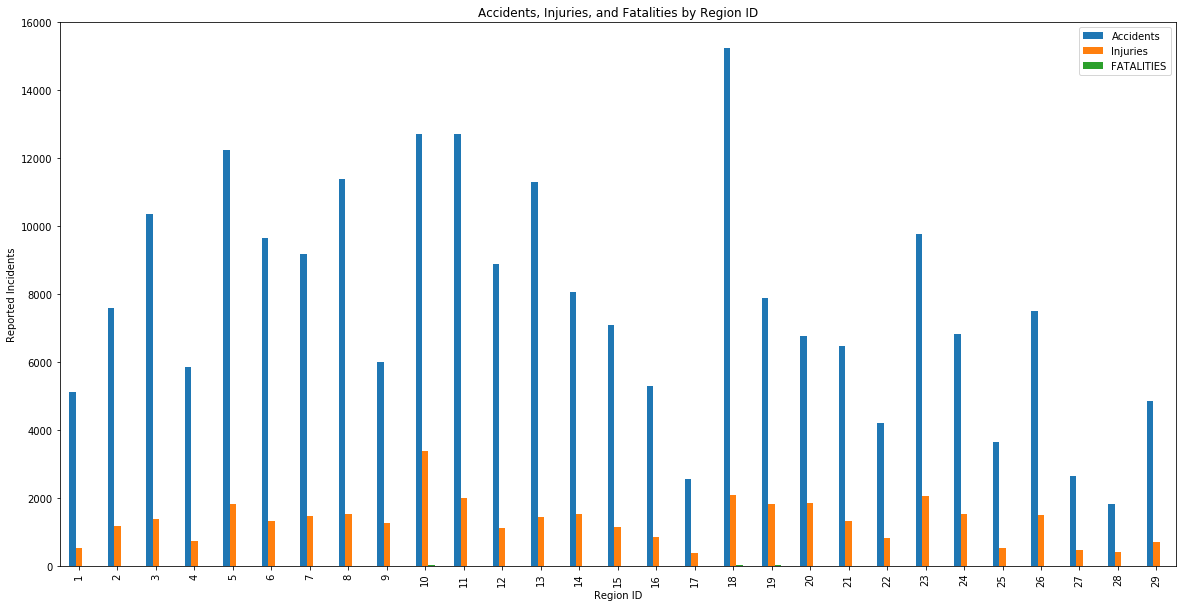

In [94]:
#Make a graph for zones vs. injuries/fatalities
zones_df.plot(kind = "bar", figsize = (20, 10))
plt.title("Accidents, Injuries, and Fatalities by Region ID")
plt.xlabel("Region ID")
plt.ylabel("Reported Incidents")
plt.savefig("Images/Accidents_by_Region")

In [69]:
crashessmall_df = crashes_df[crashes_df.YEAR != 2019]

In [7]:
monthly = crashessmall_df.groupby(["MONTH"])
accidentsm = monthly["RD_NO"].count()
injuriesm = monthly["INJURIES_TOTAL"].sum()
fatalitiesm = monthly["INJURIES_FATAL"].sum()

monthly_df = pd.DataFrame({"Accidents" : accidentsm, "Injuries" : injuriesm, "Fatalities" : fatalitiesm})
monthly_df["Month"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

monthly_df.set_index("Month")

,Accidents,Injuries,Fatalities
Month,,,
January,13758,2059.0,14.0
February,12715,1604.0,11.0
March,14270,1965.0,16.0
April,14507,2211.0,13.0
May,16362,2742.0,9.0
June,16585,2710.0,19.0
July,16908,3116.0,25.0
August,17693,3376.0,24.0
September,18742,3731.0,21.0


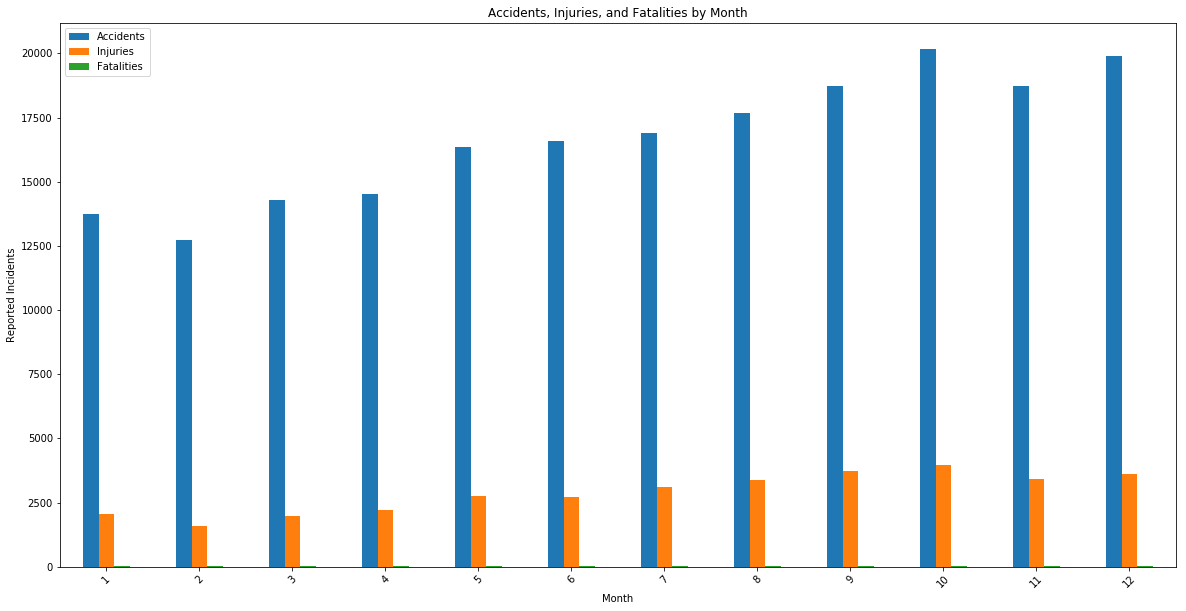

In [65]:
#Monthly bar chart
monthly_df.plot(kind = "bar", figsize = (20, 10))
plt.xticks(rotation = 45)
plt.xlabel("Month")
plt.ylabel("Reported Incidents")
plt.title("Accidents, Injuries, and Fatalities by Month")
plt.savefig("Images/weather_monthly_bar.png")

In [41]:
#Weather analysis
weather_df = crashes_df[crashes_df.WEATHER_CONDITION != "UNKNOWN"]
print(crashes_df["WEATHER_CONDITION"].value_counts())
simplified_df = weather_df["WEATHER_CONDITION"].replace({"SEVERE CROSS WIND GATE" : "OTHER", "SLEET/HAIL" : "OTHER", "FOG/SMOKE/HAZE" : "OTHER"})

weather_gb = weather_df.groupby(["WEATHER_CONDITION"])


CLEAR                     175674
RAIN                       20457
SNOW                        9880
UNKNOWN                     8740
CLOUDY/OVERCAST             7074
OTHER                        817
FOG/SMOKE/HAZE               499
SLEET/HAIL                   442
SEVERE CROSS WIND GATE        50
Name: WEATHER_CONDITION, dtype: int64


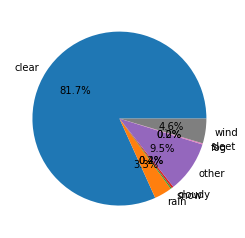

<Figure size 432x288 with 0 Axes>

In [67]:
#Pie Graphs for weather
#clear = weather_df["WEATHER_CONDITION"]["CLEAR"].count()
conditions = weather_gb["RD_NO"].count()
labels = ["clear", "rain", "snow", "cloudy", "other", "fog", "sleet", "wind"]

plt.pie(conditions, labels = labels, autopct = "%1.1f%%")

plt.show()
plt.savefig("Images/weather_pie.png")

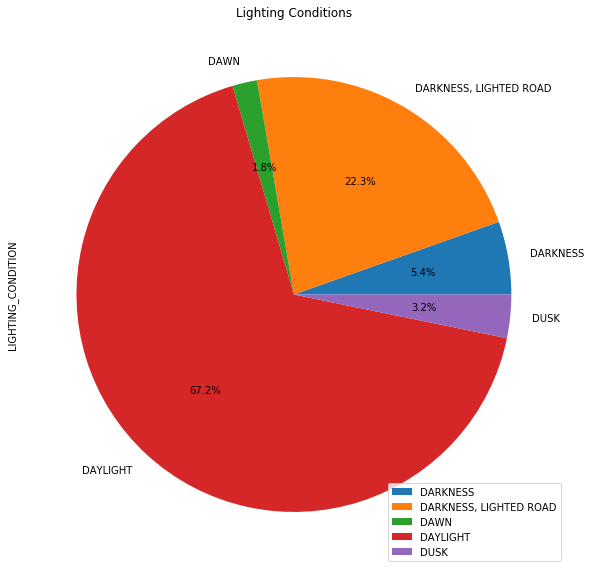

In [68]:
#Lighting Conditions
crashes_df["LIGHTING_CONDITION"].value_counts()
lighting_df = crashes_df[crashes_df.LIGHTING_CONDITION != "UNKNOWN"]
lighting_df["LIGHTING_CONDITION"].value_counts()
lighting_gb = lighting_df.groupby("LIGHTING_CONDITION")
lighting_gb = lighting_gb[["LIGHTING_CONDITION"]].count()

lighting_gb.plot(kind = "pie", autopct = "%1.1f%%", subplots = True, figsize = (10, 10))
plt.title("Lighting Conditions")
plt.legend(loc = "lower right")
plt.savefig("Images/Lighting_Conditions_Pie.png")